In [126]:
# Importing the pandas library
import numpy as np
import pandas as pd

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
DATA_JSON_FILE = '/content/drive/MyDrive/bbc-text.csv'

In [129]:
data = pd.read_csv(DATA_JSON_FILE)
data.head(20)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [130]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [131]:
df = pd.DataFrame(data)
df.drop(df.iloc[:, 2::], inplace = True, axis = 1)

In [132]:
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [133]:
classes = df['category'].unique()
print("Different Categories:",classes)

Different Categories: ['tech' 'business' 'sport' 'entertainment' 'politics']


In [134]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

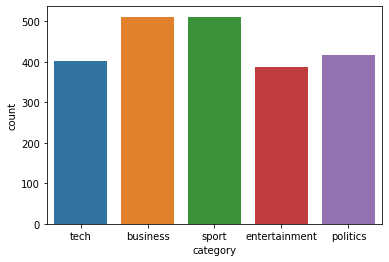

In [135]:
import seaborn as sns

sns.countplot(x='category',data = data)

In [136]:
#importing libraries
import nltk
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

In [137]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
print(stop_words)

{'her', 'through', 'up', 'at', 'below', 'such', 'while', 'mightn', 'shan', 'not', 'this', 'don', 'has', 'those', "isn't", 'above', 'both', 're', 'between', "it's", 'doesn', 'wasn', 'because', 'then', 'hers', 'than', "should've", 'my', 'isn', 'am', "aren't", 't', 'mustn', 'yourselves', 'for', 'had', 'ain', 'ours', "weren't", 'itself', 'have', 'whom', 'most', 'under', 'very', 'of', 'm', 'wouldn', 'in', 'to', 'into', 'with', 'same', "you'll", 'couldn', 'an', 'aren', 'so', 'are', 'these', 'what', 'ourselves', 'more', 'doing', "couldn't", 'was', 'again', 've', 'been', 'i', 'can', 'other', 'our', 'each', 'needn', 'y', 'be', 'is', 'haven', "you've", 'him', 'it', 'they', 'were', 'out', "didn't", "needn't", 'their', 'myself', "you'd", 'ma', 'themselves', 'how', "haven't", 'against', 'nor', 'himself', 'that', 'them', 'from', 'own', 'a', "that'll", "she's", 'the', 'yourself', 'your', 'too', 'did', 'after', 's', 'why', "doesn't", 'theirs', 'and', "won't", 'who', 'where', 'he', "wouldn't", 'hadn', 

In [139]:
def process_words(text):
    # tokenize the text
    words = text.split()
    new_words_list = []
    
    for word in words:
        # only add words which are not stop words
        if word not in stop_words:
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word, pos ='v')
            new_words_list.append(word)
    
    # concatenate the string
    return " ".join(new_words_list)


def preprocess(text):
    # convert to lower case
    text = text.lower()
    
    # replace non-alphabets with null
    text = re.sub('[^a-zA-Z ]','',text)
    
    #remove stop words
    text = process_words(text)
    
    return text

In [140]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [141]:
sample = data['text'][50]

print("Sample Text before Pre-Processing:\n",sample)

Sample Text before Pre-Processing:
 lewsey puzzle over disallowed try england s josh lewsey has claimed he was denied a late try in his side s six nations loss to ireland.  the wasps wing insisted he grounded the ball when he was bundled over the line and said referee jonathan kaplan had made a wrong decision.  i m positive i touched the ball down over the line   lewsey told bbc sport.  it certainly wasn t a turnover.  i was driven over and i put the ball on the ground. the whistle went and i let go of the ball.  lewsey added:  one of the irish players scooped it back after the whistle and to our surprise the referee then gave a turnover.  as far as i m concerned  that incident and mark cueto s effort from charlie hodgson s cross-field kick that led to what looked like a good try were the two key elements in the game.   cueto was also puzzled as to why his try had been disallowed by kaplan.  i don t think i could have been offside for  without a doubt  i was behind the ball   said the 

In [142]:
pre_sample = preprocess(sample)
print("Sample Text after Pre-Processing:\n",pre_sample)

Sample Text after Pre-Processing:
 lewsey puzzl disallow tri england josh lewsey claim deni late tri side six nation loss ireland wasp wing insist grind ball bundl line say refere jonathan kaplan make wrong decis posit touch ball line lewsey tell bbc sport certainli turnov drive put ball grind whistl go let go ball lewsey ad one irish player scoop back whistl surpris refere give turnov far concern incid mark cueto effort charli hodgson crossfield kick lead look like good tri two key element game cueto also puzzl tri disallow kaplan think could offsid without doubt behind ball say sale player move plan techniqu cuff rehear time time say rob decis go go today go us tough intern level


In [143]:
x = data['text'].apply(lambda x:preprocess(x))
print(x[:1])

0    tv futur hand viewer home theatr system plasma...
Name: text, dtype: object


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

x_counts = count_vectorizer.fit_transform(x)
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [145]:
new_x = x_counts

In [146]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 


label_encoder = LabelEncoder()
y = label_encoder.fit_transform( data['category'] )
print("Label Encodings:",y)

Label Encodings: [4 0 3 ... 1 2 3]


In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=0.15)
print("Size of Training data:",x_train.shape[0])
print("Size of Testing data:",x_test.shape[0])

Size of Training data: 1891
Size of Testing data: 334


In [148]:
# Loading the libraires
from sklearn.naive_bayes import MultinomialNB

In [149]:
nb_model = MultinomialNB()

In [150]:
nb_model.fit(x_train,y_train)

MultinomialNB()

In [151]:
def check_accuracy(model,x_test,y_test):
    total = x_test.shape[0]
    count =  0
    res = model.predict(x_test)
    for i in range(total):
        y_true = y_test[i]
        if y_true == res[i]:
            count+=1
    return count/total

In [152]:
print("Naive Bayes Accuracy:",check_accuracy(nb_model,x_test,y_test))

Naive Bayes Accuracy: 0.9610778443113772


In [161]:
sample_data = "tigers wary of farrell gamble leicester say"
processed_data = preprocess(sample_data)
x_sample = count_vectorizer.transform([processed_data])

In [162]:
nb_result =  nb_model.predict(x_sample)

In [163]:
nb_result = label_encoder.inverse_transform(nb_result)

In [164]:
print("Naive Bayes Result:",nb_result)

Naive Bayes Result: ['sport']
